In [2]:
import pandas as pd
import numpy as np

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# feature names are initialized
features = ["harmonic_mean", "harmonic_var", "percussive_mean", "percussive_var", 
            "rms_mean", "rms_var", 
            "spec_second_mean", "spec_second_var", "spec_third_mean", "spec_third_var", "spec_fourth_mean", "spec_fourth_var"];

for i in range(1, 21):
  feature_name = "mfcc" + str(i) + "_mean"
  features.append(feature_name)

for i in range(1, 21):
  feature_name = "mfcc" + str(i) + "_var"
  features.append(feature_name)

X = pd.read_csv("data.txt", names=features) # data points are read
y = pd.read_csv('y.txt', names=range(1, 10001)); # data target labels are read
y = y.transpose()

X.head()

,harmonic_mean,harmonic_var,percussive_mean,percussive_var,rms_mean,rms_var,mfcc1_mean,mfcc2_mean,mfcc3_mean,mfcc4_mean,mfcc5_mean,mfcc6_mean,mfcc7_mean,mfcc8_mean,mfcc9_mean,mfcc10_mean,mfcc11_mean,mfcc12_mean,mfcc13_mean,mfcc14_mean,mfcc15_mean,mfcc16_mean,mfcc17_mean,mfcc18_mean,mfcc19_mean,mfcc20_mean,mfcc1_var,mfcc2_var,mfcc3_var,mfcc4_var,mfcc5_var,mfcc6_var,mfcc7_var,mfcc8_var,mfcc9_var,mfcc10_var,mfcc11_var,mfcc12_var,mfcc13_var,mfcc14_var,mfcc15_var,mfcc16_var,mfcc17_var,mfcc18_var,mfcc19_var,mfcc20_var
0,-0.000434,0.016616,0.000091,0.003154,0.892435,0.212136,-305.276145,102.970040,-15.784277,22.488545,-7.454023,11.841492,-15.461350,9.862830,-10.437974,6.075381,-7.379266,5.309287,-6.333436,1.053453,-5.372295,-3.197064,-4.281435,4.217474,-0.720029,2.785685,1421.724791,188.392554,230.947063,153.532868,92.675490,59.347537,40.615163,91.261276,41.045877,47.380583,24.374518,31.304469,40.654151,45.270105,31.516370,37.143725,30.188149,28.651124,32.468285,39.488528
1,-0.001455,0.115904,0.000343,0.003082,0.925473,0.147437,-309.396220,98.419074,-13.620419,29.280615,-8.151329,10.412821,-13.358834,11.180154,-9.845145,8.475532,-6.782378,2.528280,-7.013063,3.937632,-4.403384,-0.181495,-3.347732,0.896709,-3.711570,1.655721,1044.818842,147.375205,185.082512,120.653754,99.493039,64.234293,70.701665,77.484322,53.170128,31.829665,44.785827,27.141830,30.997390,27.409613,37.851881,33.525213,49.169169,45.981784,33.591614,29.640176
2,0.000114,0.041310,0.000308,0.002939,0.860648,0.257857,-315.401490,95.842786,-9.851902,32.026538,-3.645737,14.523937,-15.181421,8.759943,-9.693072,8.544772,-5.307254,8.712794,-3.479834,2.043045,-5.557813,0.748393,-5.264789,-0.330095,-6.001365,-0.404455,2215.836839,151.262434,148.660587,174.917878,113.738345,62.505684,55.341755,43.590972,52.727446,38.599423,40.274926,30.474769,34.377362,23.129892,33.905221,33.885709,25.746408,43.937447,29.142208,34.770645
3,0.000548,0.020009,0.000100,0.003790,0.908270,0.163044,-306.192907,104.448116,-10.188918,22.602304,-11.072670,10.599012,-12.670250,10.574702,-9.425024,7.238131,-8.094229,3.311221,-5.485734,2.737581,-5.150874,-3.273648,-3.192462,3.570446,-2.642299,1.080404,1354.682555,211.594419,99.496202,173.625522,93.542534,93.334123,57.905422,82.287820,39.688940,31.729144,46.340834,38.853521,21.898659,31.601608,29.683524,41.855787,27.303235,37.961952,23.722562,22.398690
4,0.001530,0.023583,0.000485,0.003800,0.940077,0.113456,-296.847201,106.182294,-10.588250,21.866456,-11.954107,9.402441,-12.731481,13.393115,-9.455234,8.024134,-4.347099,8.237493,-4.509351,-1.482208,-5.964235,-2.589154,-1.029054,1.179871,-4.568912,-1.015470,1176.082079,137.977460,124.723025,108.524123,70.047757,57.760089,53.318043,38.508085,47.466958,41.714011,37.002270,34.939418,31.307434,26.822835,30.240494,34.428736,30.843933,22.655314,26.512963,23.158153


In [ ]:
new_features = pd.read_csv("features_3_sec.csv")
y_new = new_features["label"]
new_features.drop(["filename", "length", "label"], axis=1, inplace=True)

new_features.head()

In [ ]:
X_train = pd.read_csv("mfcc_train.txt", names=range(1, 21))
X_test = pd.read_csv("mfcc_test.txt", names=range(1, 21))

y_train = pd.read_csv('y_train.txt', names=range(1, 8001));
y_train = y_train.transpose()

y_test = pd.read_csv("y_test.txt", names=range(1, 2001));
y_test = y_test.transpose()


In [ ]:
classes = pd.Series(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock'])

X_train = pd.read_csv("mfcc_train.txt", names=range(1, 15))
X_test = pd.read_csv("mfcc_test.txt", names=range(1, 15))
# X_valid = pd.read_csv("mfcc_valid.txt", names=range(1, 14))

y_train = classes.repeat(480)
y_test = classes.repeat(120)
# y_valid = classes.repeat(100)

In [ ]:
random_feature = np.random.randn(9990, 1)
new_features["rand"] = random_feature
new_features.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,rand
0,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,0.081851,0.000558,-0.000078,0.008354,-0.000068,0.005535,129.199219,-118.627914,2440.286621,125.083626,260.956909,-23.443724,364.081726,41.321484,181.694855,-5.976108,152.963135,20.115141,75.652298,-16.045410,40.227104,17.855198,84.320282,-14.633434,83.437233,10.270527,97.001335,-9.708279,66.669891,10.183875,45.103611,-4.681614,34.169498,8.417439,48.269444,-7.233477,42.770947,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,-0.883777
1,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,0.087173,0.001030,-0.000099,0.004950,-0.000103,0.004854,123.046875,-125.590706,2038.344238,122.421227,216.774185,-20.718019,231.979767,50.128387,142.700409,-11.333302,139.243118,21.385401,77.817947,-15.960796,97.364029,19.454103,57.948093,-12.465918,68.271523,17.898169,56.222176,-11.732554,54.373909,8.145000,40.662876,-7.717751,30.808521,8.397150,48.784225,-8.300493,68.584824,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,-1.270438
2,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,0.071383,0.000425,-0.000066,0.012476,0.000065,0.004357,123.046875,-132.441940,3798.532227,115.085175,257.321289,-14.811666,192.448074,50.189293,144.166031,-0.680819,128.376892,24.650375,66.371170,-13.506104,89.319336,15.643386,55.253967,-13.216637,120.308784,10.406025,35.757862,-7.991465,47.911613,11.853963,36.569931,-4.677677,40.725075,6.571110,30.686846,-2.424750,50.313499,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,-0.995891
3,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,0.069426,0.000304,-0.000014,0.008318,0.000018,0.005927,123.046875,-118.231087,2508.781006,132.116501,332.650574,-18.758335,109.357529,39.769306,184.693344,-13.260426,144.398224,20.468134,122.516464,-14.563448,68.937332,18.745104,74.748886,-13.755463,73.868576,12.993759,41.549564,-12.648887,58.540478,10.389314,39.102024,-4.362739,60.714748,9.156193,40.411537,-9.889441,44.666325,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,0.772925
4,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,0.070095,0.000289,0.000041,0.009634,-0.000106,0.005833,123.046875,-105.968376,2118.919922,134.643646,219.562622,-19.961748,171.878754,40.171753,103.120712,-14.271939,102.651230,18.734617,79.070000,-15.619381,48.510284,19.207966,53.642956,-18.274683,95.300995,14.316693,58.821163,-5.792194,55.030254,17.045437,43.229939,-5.681399,46.515259,5.705521,24.956211,-7.986080,39.816933,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,-1.627532


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, 
                                                    random_state=11)

              precision    recall  f1-score   support

       blues       0.78      0.84      0.81       199
   classical       0.86      0.91      0.89       211
     country       0.66      0.70      0.68       197
       disco       0.68      0.69      0.68       184
      hiphop       0.84      0.74      0.79       191
        jazz       0.76      0.86      0.81       218
       metal       0.85      0.91      0.88       212
         pop       0.72      0.80      0.76       186
      reggae       0.75      0.70      0.73       199
        rock       0.69      0.45      0.54       203

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000



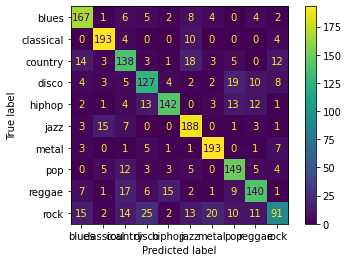

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix

model_rf = RandomForestClassifier(n_estimators=160,
                                  min_samples_leaf=10,
                                  max_depth=50,
                                  random_state=11)

# Fit the model to the training set
model_rf.fit(X_train, y_train)

# Predict from the test set
y_pred = model_rf.predict(X_test)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(model_rf, X_test, y_test)

In [5]:
import plotly.express as px
import plotly.graph_objs as go

importances = model_rf.feature_importances_
names = X_train.columns

my_data = [go.Bar( x = names, y = importances)]
my_layout = ({"yaxis": {"title":"Importance"},
              "xaxis": {"title":"Feature"},
              "showlegend": False})

fig = go.Figure(data = my_data, layout = my_layout)
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=50);
# Fit the model to the training set
model_knn.fit(X_train, y_train)

# Predict from the test set
y_pred = model_knn.predict(X_train)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(model_knn, X_test, y_test)

ValueError: ignored

              precision    recall  f1-score   support

       blues       0.17      0.14      0.15       200
   classical       0.96      0.70      0.81       200
     country       0.32      0.46      0.37       200
       disco       0.34      0.32      0.33       200
      hiphop       0.33      0.34      0.34       200
        jazz       0.32      0.26      0.28       200
       metal       0.66      0.52      0.58       200
         pop       0.81      0.71      0.76       200
      reggae       0.26      0.39      0.31       200
        rock       0.25      0.28      0.27       200

    accuracy                           0.41      2000
   macro avg       0.44      0.41      0.42      2000
weighted avg       0.44      0.41      0.42      2000



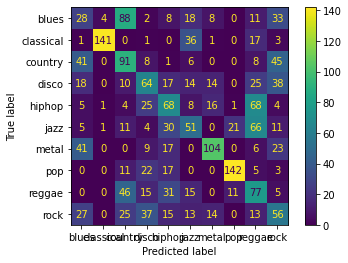

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model_ab = AdaBoostClassifier(base_estimator=model_rf,
                              random_state=11)

# Fit the model to the training set
model_ab.fit(X_train, y_train)

# Predict from the test set
y_pred = model_ab.predict(X_test)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(model_ab, X_test, y_test)

              precision    recall  f1-score   support

       blues       0.49      0.30      0.37        60
   classical       0.65      0.62      0.63        60
       disco       0.32      0.32      0.32        60
      hiphop       0.29      0.27      0.28        60
        jazz       0.59      0.57      0.58        60
       metal       0.48      0.45      0.47        60
         pop       0.70      0.67      0.68        60
      reggae       0.19      0.25      0.22        60
        rock       0.28      0.38      0.33        60

    accuracy                           0.42       540
   macro avg       0.44      0.42      0.43       540
weighted avg       0.44      0.42      0.43       540



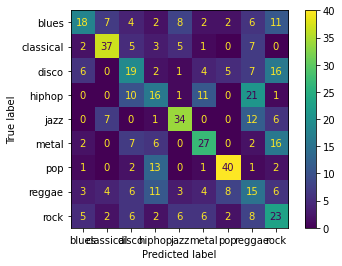

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier(random_state=11)

# Fit the model to the training set
model_gb.fit(X_train, y_train)

# Predict from the test set
y_pred = model_gb.predict(X_test)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(model_gb, X_test, y_test)

In [ ]:
# drops blues
X_train.drop(range(0, 799), inplace=True)
y_train.drop(0, inplace=True)

In [ ]:
# drops blues
X_test.drop(range(0, 100), inplace=True)
y_test.drop(0, inplace=True)

              precision    recall  f1-score   support

       blues       0.17      0.02      0.04       200
   classical       0.56      0.74      0.64       209
     country       0.17      0.35      0.23       190
       disco       0.23      0.28      0.25       190
      hiphop       0.07      0.01      0.02       194
        jazz       0.50      0.05      0.09       213
       metal       0.22      0.50      0.31       206
         pop       0.42      0.43      0.42       202
      reggae       0.25      0.45      0.32       195
        rock       0.00      0.00      0.00       199

    accuracy                           0.28      1998
   macro avg       0.26      0.28      0.23      1998
weighted avg       0.26      0.28      0.23      1998



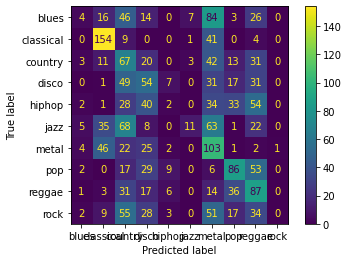

In [ ]:
from sklearn.svm import SVC

model_svc = SVC(random_state=11)

# Fit the model to the training set
model_svc.fit(X_train, y_train)

# Predict from the test set
y_pred = model_svc.predict(X_test)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(model_svc, X_test, y_test)

In [ ]:
import pickle

filename = 'music_genre_classifier.sav'
pickle.dump(model_ab, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.525
